Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [6]:
import itertools
import random
from collections import Counter
import re

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [7]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [12]:
#df_zoo["animal"]

#df_zoo.animal

2 - Transforme os campos com as strings "True"/"False" em variáveis booleanas True/False  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html)  

Obs: O Pandas já inferiu que as variáveis originais são de tipo booleano, mas como você faria se não o fossem; se fossem strings, por exemplo?  

In [4]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(15), int64(1), object(2)
memory usage: 3.9+ KB


In [5]:
type(df_zoo.feathers[0])

numpy.bool_

3 - Crie um novo dataframe somente com os Mamíferos

In [6]:
df_zoo[df_zoo.type == 'mammal']

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
10,cheetah,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
17,deer,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
19,dolphin,False,False,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

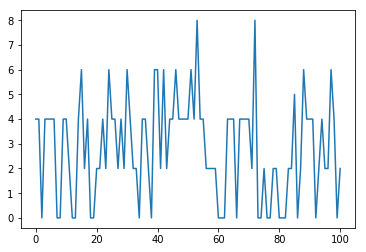

In [7]:
df_zoo.legs.plot()

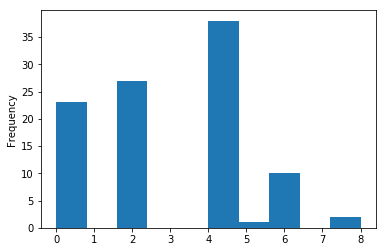

In [8]:
df_zoo.legs.plot(kind='hist')

In [9]:
df_zoo[df_zoo.legs == 5]

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
85,starfish,False,False,True,False,False,True,True,False,False,False,False,False,5,False,False,False,invertebrate


5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [13]:
PIROCA = sqlite3.connect('tabela_zoo') #AQUI EU VOU TE EXPLICAR OQ TA ROLANDO NESSA PORRA. 

In [14]:
df_zoo.to_sql('tabela_zoo', con=PIROCA)

In [15]:
cur = PIROCA.cursor()

In [16]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('tabela_zoo',)]


In [17]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

var=list(cur)

(0, 'aardvark', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(1, 'antelope', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(2, 'bass', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(3, 'bear', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(4, 'boar', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(5, 'buffalo', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(6, 'calf', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 'mammal')
(7, 'carp', 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'fish')
(8, 'catfish', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(9, 'cavy', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 'mammal')
(10, 'cheetah', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(11, 'chicken', 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 'bird')


In [18]:
new_df = pd.read_sql_query("SELECT * FROM tabela_zoo;", PIROCA)
new_df.head()

,index,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - [Ordene as palavras do texto nas formas abaixo](https://jupyterhub.namd.mat.br/user/rsouza/notebooks/FGV_Programming_Languages/Bash/Unix4Poets.ipynb):
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [4]:
!cat ../Dados/DomCasmurroMachadoAssis.txt


In [2]:
!ls 


Avaliacoes			   Exercicios_simple_email_extraction.ipynb
Dojo				   Exercicios_text_operations.ipynb
Exercicio_Mega_Sena.ipynb	   Exercicios_Web_Scraping.ipynb
Exercicios_Random_Fibo_Find.ipynb  limpeza_texto.ipynb
Exercicios_Revisao_A1.ipynb	   Linguagens_Comparadas.ipynb
Exercicios_Revisao_A2-Copy1.ipynb  Project_Euler
Exercicios_Revisao_A2.ipynb


In [20]:

! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc "[A-Z][a-z]" "[\012*]" | sort | uniq -c 

      1 
      1 ]
   2742 a
    257 A
      1 ab
      1 abafadas
      1 abafado
      1 abafando
      1 abafava
      1 abahuladas
      4 abaixo
      2 Abaixo
      1 abaixou
      2 abalo
      1 abalou
      1 abanando
      3 abanava
      1 abandone
      3 Abane
      3 abanou
      1 abarcar
      2 abatida
      3 abatido
      1 abatimento
      1 Abel
      2 aben
      1 aberra
      2 aberta
      1 abertas
      4 aberto
      5 abertos
      1 abide
      1 abobada
      1 abolir
      2 abomina
      1 abominaveis
      1 aborrece
      1 aborrecem
      4 aborrecer
      1 aborreciamos
      3 aborrecida
      5 aborrecido
      2 aborrecimento
      2 aborrecivel
      1 abortado
      1 abotoada
      1 abotoado
      1 abotoe
      7 about
      1 About
      1 abr
     10 abra
      1 Abrah
      1 abre
      1 Abre
      1 abreviado
      1 abri
      1 Abri
      6 abria
      1 abrigado
      3 abril
      1 Abril
      1 Abrimos
      2 abrindo
      6 abri

      1 captivava
      1 capuchinhos
     35 cara
      3 caracter
      8 caras
      1 card
      1 cardeal
      1 carecesse
      1 careciam
      3 cargo
      3 caricias
      5 caridade
      1 caridoso
      1 carinho
      1 carinhos
      1 carinhosos
      1 Carmo
      3 carne
      3 carnes
      5 caro
      1 Caro
      2 carola
      1 carrancismo
      1 carregado
      1 carregar
     11 carreira
      1 carreiras
     15 carro
      2 carros
      1 carry
      2 cart
      8 carta
     11 cartas
      1 cartaz
      2 cartorio
      1 cas
    170 casa
      1 Casa
      1 casaca
      1 casacas
      7 casada
      1 casadas
      4 casado
      3 casados
      2 casaes
      2 casal
      1 casam
      6 casamento
      3 casando
     12 casar
      1 casarei
     16 casas
      2 casca
      7 case
      1 casei
      1 caseira
      1 casemo
      1 casmurrice
      2 casmurro
      9 Casmurro
      3 CASMURRO
     32 caso
      2 Caso
      6 casos
      3 caso

      1 nhamos
      1 nhonh
      1 Nhonh
     28 ninguem
      2 Ninguem
      1 ninho
      1 ninhos
      6 nisso
      9 nisto
      3 Nisto
    312 no
     38 No
      2 NO
      1 nobre
      1 nobremente
      1 nobreza
     42 noite
     11 noites
      1 noivos
      1 nojentos
      1 nojosa
      1 nol
     20 nome
      1 nomeado
      1 nomeava
     11 nomes
      2 non
      1 nonproprietary
      3 nora
      1 normaes
      1 Norte
      1 North
    119 nos
      5 Nos
     57 nossa
      1 Nossa
     24 nossas
     33 nosso
      4 Nosso
     19 nossos
      1 noster
     26 not
      2 NOT
      5 nota
      1 Nota
      1 notado
      5 notar
      2 notaram
      3 notas
      1 Note
      1 notei
      1 Notei
      2 notice
      1 NOTICE
     14 noticia
      1 Noticia
      9 noticias
      1 notifies
      2 notou
     25 nova
      1 Nova
     15 novamente
      2 Novamente
      9 novas
      6 nove
      2 novelle
      3 Novembro
      2 novidade
      8 n

In [48]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c | sed -n '110,130p'

      3 dada
      1 assobradada
      1 mandada
      1 prendada
      2 guardada
      1 mudada
      1 lisongeada
      1 creada
      3 fada
      1 almofada
      2 socegada
      2 chegada
      1 obrigada
      2 castigada
      1 zangada
      1 engasgada
      3 madrugada
      1 trabalhada
      1 palhada
      1 atrapalhada
      1 enxovalhada


In [23]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c | sed 20q

      1 
      1 ]
   2742 a
    257 A
      2 acaba
      1 saiba
      1 amba
      1 emba
      1 barba
      1 Corityba
      9 ca
      1 fraca
      1 casaca
      1 sobrecasaca
     16 ressaca
      1 pataca
      4 vacca
      3 secca
     36 bocca
      2 rabeca
uniq: write error: Broken pipe


2 - Quantas palavras maiúsculas distintas há no texto?

In [42]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep "^[A-Z]" | sort | uniq -c | sort -nr | wc -l

1499


3 - Quantas palavras há com apenas uma; com apenas duas; e com apenas 3 vogais?

In [55]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep -i "^[^aieou]*[aeiou]\{1,\}[^aeiou]*$"

The
of
Dom
de
This
is
for
the
of
in
the
and
most
parts
of
the
world
at
no
cost
and
with
no
You
may
copy
it
it
or
re
it
the
terms
of
the
with
this
or
at
org
If
you
not
in
the
you
to
check
the
laws
of
the
country
you
this
Dom
de
START
OF
THIS
DOM
Marc
at
Free
soon
in
an
to
free
for
MOOC
the
DOM
POR
DE
DA
RUA
RIO
DE
RUE
DES
SAINTS
RES
I
Do
da
o
no
trem
da
um
do
que
eu
o
de
e
de
chap
o
me
se
ao
de
mim
da
lua
e
dos
e
me
A
e
os
de
ser
que
o
maus
por
que
eu
can
os
tres
ou
que
a
e
os
no
eu
o
Vi
lhe
um
os
vez
do
mas
o
do
No
dia
a
de
mim
feios
e
me
Dom
Os
que
o
dos
meus
e
que
Nem
por
me
a
aos
da
e
por
gra
a
me
em
Dom
vou
com
voc
Vou
Dom
a
a
da
se
do
e
vae
uns
dias
Meu
Dom
o
que
o
do
e
na
dou
lhe
dou
lhe
dou
lhe
o
lhe
dou
mo
a
o
o
est
no
que
lhe
o
mas
no
que
lhe
poz
o
de
e
Dom
veiu
por
me
de
por
o
a
o
se
o
at
ao
fim
do
vae
O
meu
do
trem
que
o
lhe
E
com
o
o
seu
que
a
sua
Ha
que
ter
o
dos
seus
nem
II
Do
que
o
a
o
por
os
que
me
em
a
na
o
com
um
A
em
que
fil
a
de
de
um
o
que
me
o
mas
Um
dia
ha
me
no


lhe
Se
a
que
de
mim
se
o
que
o
Mas
foi
e
que
o
a
o
sei
Ent
o
Voc
o
o
em
que
ou
a
e
Vi
uns
e
me
o
que
os
Ent
o
quiz
vel
os
de
e
dei
um
me
mas
ou
por
que
eu
ou
por
de
e
o
Foi
o
que
em
mim
o
de
ler
o
que
XIV
A
o
o
que
no
fim
do
foi
de
um
O
que
se
lhe
foi
mais
Dei
um
e
que
o
li
dous
ao
o
me
os
no
o
os
e
fic
mos
a
um
o
o
de
crean
as
tu
bem
duas
ou
tres
mas
ser
Em
o
fal
mos
o
por
o
nos
as
os
que
se
a
se
se
se
o
a
tel
a
a
de
e
que
eu
com
os
de
que
mas
o
tal
a
a
o
e
o
as
do
sem
as
do
de
e
de
o
solt
mos
as
os
nem
se
cair
de
can
ou
de
Os
se
e
se
e
de
ao
a
se
uns
de
um
das
a
e
a
o
A
ser
o
os
a
a
por
um
que
e
a
dos
o
me
por
a
da
o
o
que
no
com
o
ceu
em
As
os
os
das
duas
mas
Os
a
as
de
que
nem
sair
ao
o
voz
voz
mas
vez
voz
de
Voc
est
o
o
o
pae
de
que
dos
ao
da
Solt
mos
as
os
e
fic
mos
foi
ao
e
com
o
os
o
me
o
do
o
bem
o
saiu
ao
a
ver
o
que
mas
a
um
que
ser
o
e
ser
da
e
fel
o
rir
o
De
sem
do
ou
que
em
que
nos
um
e
e
bra
os
lhe
veiu
a
de
que
Jos
Dias
lhe
poz
lhe
em
o
Voc
o
um
do
que
por
sim
mas
ri
o


ter
ao
bra
o
do
o
e
o
Jos
Dias
deu
duas
a
me
no
bra
o
e
fez
me
o
o
os
fieis
o
da
na
a
vez
que
me
em
o
a
mas
do
o
que
por
me
dar
um
de
o
o
ou
a
as
um
o
meu
que
ia
o
Deu
veiu
nos
Jos
Dias
fez
um
de
e
lhe
com
o
que
as
os
ao
o
se
eu
fiz
a
do
o
das
do
Jos
Dias
si
Ha
vel
o
o
Pois
Jos
Dias
Mas
eu
mas
Jos
Dias
eu
do
que
ao
em
a
em
voz
e
O
o
meio
de
a
a
si
de
um
dos
do
que
a
ao
na
Jos
Dias
fez
mas
Jos
Dias
o
o
vez
que
a
mim
a
quem
o
mais
as
o
o
de
um
pae
O
o
que
me
de
me
ver
com
e
aos
de
se
eu
dev
ras
o
mas
vae
sel
o
Jos
Dias
o
mim
que
do
Bem
ao
o
pae
de
quiz
lhe
a
me
que
o
aos
mas
que
a
vez
do
A
o
do
de
o
e
o
Foi
que
me
e
cheio
de
pia
e
o
o
com
que
entr
ra
na
a
vez
do
que
de
ir
o
E
E
vez
a
o
ao
Quiz
lhe
a
o
me
de
e
ao
o
que
nos
a
e
a
mim
com
as
duas
da
a
do
e
e
o
o
de
e
nos
os
saiu
o
rua
me
vi
com
das
fieis
que
se
ro
a
a
o
rma
mais
de
a
e
a
o
do
meu
De
o
o
por
nem
ao
que
a
mim
a
a
com
o
ar
de
ser
o
Deus
dos
Com
me
can
os
bra
os
ca
am
me
a
na
rua
do
A
de
ou
que
do
A
mo
a
o
nem
gra
a
os
ca
am
e


se
pass
ra
com
e
a
o
vez
o
a
o
me
me
que
se
lhe
as
as
mas
doia
me
vel
a
a
a
das
que
me
de
a
e
de
por
de
Jos
Dias
bem
o
ter
um
que
eu
que
XLIII
Voc
tem
De
a
o
em
mim
os
de
e
me
se
Sim
se
voc
tem
de
que
de
de
ser
de
do
de
o
Se
me
tem
de
ser
que
eu
ou
o
em
Mas
e
o
o
que
Mas
o
De
Sim
de
quem
Quem
que
me
fez
um
de
Os
de
o
se
e
Sem
de
mim
e
o
a
a
me
e
e
que
e
quem
que
me
de
me
Deus
vi
de
o
o
e
vi
a
o
dos
e
a
de
o
es
me
no
seu
sem
que
os
de
de
de
mim
a
tal
que
as
de
O
de
foi
o
os
at
es
e
dar
lhes
o
do
ao
que
me
que
o
me
e
com
um
cheio
de
gra
a
me
na
e
Eu
Mas
o
Pois
quem
que
ha
de
dar
ou
voc
que
eu
meia
e
o
voc
o
est
o
de
tom
de
Tem
raz
o
foi
at
at
Est
me
a
do
a
vou
de
lim
o
nas
Fez
o
que
e
o
len
o
vez
na
Em
me
ao
se
de
mim
mas
nos
por
a
do
po
o
o
ceu
da
o
de
um
e
por
mais
que
eu
raz
es
a
o
no
o
com
um
o
cie
e
que
se
a
das
suas
es
lhe
de
e
me
os
por
no
quiz
o
no
o
e
lhe
a
o
me
ou
o
me
XLIV
O
mim
mas
de
um
que
me
fez
a
o
de
Jos
Dias
e
o
sem
os
A
voz
um
me
me
mas
o
ha
de
com
o
o
na
o
Que
Se
voc


de
boa
Ha
ncias
que
o
am
que
a
ou
a
as
Um
de
que
tem
boa
A
cheia
de
taes
e
eu
sou
um
a
de
ter
a
o
me
o
de
tal
mas
um
e
o
o
a
o
boa
Ao
a
que
por
sem
nem
nem
e
A
quem
a
na
de
com
os
seus
e
e
es
que
se
lhe
e
o
eu
os
que
o
a
das
cal
as
que
Eu
o
com
a
das
que
que
o
mas
de
ser
e
o
E
que
o
me
se
bem
nos
mas
se
de
nos
Eu
leio
o
me
O
que
fa
o
em
ao
fim
os
e
as
que
o
me
ent
o
Que
de
es
Os
rios
as
as
que
o
vi
nas
me
com
as
suas
as
suas
os
seus
e
os
das
que
na
e
os
as
que
no
e
com
que
se
ra
de
um
as
des
as
fiz
eu
ao
de
e
fiz
mais
puz
lhe
o
o
que
da
mas
que
o
o
as
meias
as
o
e
rios
ver
o
mais
que
dia
me
foi
das
do
tu
o
mas
que
mais
um
par
de
ha
vez
no
de
um
e
de
dous
e
o
de
que
as
cal
de
manh
ao
da
ou
as
ao
E
se
a
o
o
as
o
da
e
o
dos
est
o
as
a
da
rua
a
da
um
um
o
de
das
que
no
cap
XVIII
o
o
das
o
de
que
me
o
por
um
de
e
o
do
Se
o
foi
a
quem
o
me
o
no
que
lhe
que
o
a
o
aos
que
por
me
ao
do
o
e
a
da
que
o
puz
nem
creio
que
o
que
os
preg
es
de
rua
os
de
e
es
que
a
os
e
no
sem
o
que
e
Mas
ao
mais
que


e
vez
que
a
do
um
da
plat
a
o
o
do
se
a
da
de
e
a
de
um
um
dandy
ent
o
um
o
na
na
o
a
de
e
a
o
me
e
iam
suas
do
a
Rel
um
um
dos
seus
de
de
o
de
sem
duas
um
e
Rel
de
das
suas
a
que
em
e
ver
a
no
um
por
trez
mil
reis
Trez
mil
reis
se
na
dos
o
dandy
do
baio
o
os
a
do
e
soou
a
faz
o
que
o
seu
O
o
se
de
ir
mas
a
a
o
o
de
e
e
o
a
a
do
se
ir
traz
Tal
foi
o
de
que
me
A
as
mas
no
da
o
e
e
o
com
um
o
de
o
meu
Nem
a
sa
da
rua
meu
e
dei
por
mim
na
de
LXXIV
A
Na
de
tio
e
Jos
Dias
um
e
A
de
Jos
Dias
me
o
que
me
diss
ra
no
o
da
a
que
com
o
ao
Tal
o
a
o
que
eu
da
rua
mas
o
que
me
a
crer
na
dos
seus
A
que
foi
em
Jos
Dias
o
ao
e
lhe
se
de
ou
por
mas
Jos
Dias
que
par
ra
ao
ver
me
a
e
a
Eu
ir
ao
que
da
e
o
a
e
E
os
dous
at
que
tio
se
ir
ver
a
e
Jos
Dias
veiu
ter
ao
o
da
Ha
um
eu
de
lhe
o
que
e
os
do
que
o
com
de
o
Quiz
lhe
a
Jos
Dias
viu
no
meu
da
o
e
me
com
Que
o
o
cair
os
Os
que
das
das
cal
as
do
e
em
o
que
que
eu
com
o
a
a
Jos
Dias
se
eu
sa
O
ao
a
e
o
ao
mas
o
a
mim
ao
meu
e
de
mim
Eu
me
eu
me
eu
me
e


nem
me
o
das
de
sua
e
e
os
de
e
se
eu
o
a
em
dous
em
um
me
a
e
na
lhe
em
um
os
das
e
dos
no
os
de
os
e
eu
o
as
as
e
Oh
o
o
mais
Foi
e
em
meio
me
que
o
de
e
que
os
de
de
a
Pois
em
que
eu
tres
ou
e
de
ser
no
fel
o
de
me
e
se
o
Eu
por
lhe
que
sim
do
o
que
com
a
e
o
nem
um
que
as
o
mais
e
mais
A
A
o
com
a
do
meu
que
o
de
al
o
no
a
o
um
que
com
o
A
nos
o
dem
se
com
o
me
que
os
e
o
de
e
me
o
que
o
se
peor
lhe
a
na
Mas
mais
que
at
me
a
o
com
tal
for
a
que
me
doem
os
o
de
se
o
das
que
a
sem
a
por
O
A
de
fez
se
e
a
de
Jos
Dias
o
lhe
quiz
Na
me
em
que
voc
vae
sair
do
at
Vou
com
que
me
no
no
ou
na
rua
lhe
o
que
ha
A
o
que
o
est
mal
no
Mas
Cert
No
dia
me
o
Ao
que
de
e
de
que
aos
meus
de
o
que
e
ao
do
que
e
ver
me
ra
mas
que
o
da
a
o
e
a
com
o
de
aos
que
e
eu
a
a
o
do
Que
me
me
bem
de
de
o
de
ser
um
bom
o
o
Vou
com
lhe
e
a
dous
ou
que
vem
me
Oh
o
em
que
Voc
o
que
quer
o
se
com
o
seu
Voc
o
que
quer
a
duas
e
mas
eu
a
que
E
que
o
o
que
lhe
tal
o
nem
nem
nem
o
de
no
a
e
lhe
que
a
o
me
o
o
Pois
o
se
vae

os
e
aos
E
aos
Deus
o
que
os
mais
os
Da
que
me
o
que
lhe
ent
o
que
o
Ent
o
ar
as
raz
es
que
que
o
que
voc
vae
Tom
mos
mim
se
que
eu
a
por
me
a
a
mas
tal
o
ia
com
a
saiu
as
a
as
com
a
que
um
gra
a
sua
de
as
de
o
dos
e
que
veiu
at
a
que
est
com
a
Tens
raz
o
de
Eu
ent
o
um
po
o
do
mim
rans
a
de
me
o
lhe
que
a
e
um
fria
e
com
Pois
a
de
Ja
a
voc
o
que
de
Mam
tem
de
voc
que
e
as
a
ser
o
que
Em
lhe
o
Mas
eu
que
fria
com
vae
mam
e
o
lhe
faz
as
gra
as
Quem
se
o
com
o
Pois
com
a
lhe
que
os
seus
o
o
nem
e
o
de
ou
do
vi
Mas
de
o
quer
dos
e
na
o
o
da
Jos
Dias
do
e
suas
da
da
e
da
tio
das
suas
da
a
ou
de
Jos
Dias
sa
a
da
volt
mos
por
a
das
me
que
um
dia
e
Ao
que
me
de
em
foi
vez
mais
o
me
ia
o
me
os
mas
eu
via
no
da
as
da
a
da
e
a
com
o
hav
a
ver
o
da
e
da
e
me
a
de
CXVI
do
Jos
Dias
as
de
e
o
nem
os
que
e
os
ou
o
no
ro
mas
a
quem
eu
a
que
foi
ben
o
do
ceu
Que
nos
saiu
a
crean
a
de
O
pae
que
nos
um
em
o
nos
mas
em
bem
Pois
sim
a
sua
e
Ent
o
mam
e
Mas
e
o
nos
ha
Creio
que
tem
mais
dos
seus
tem
frio
a


a
e
que
o
e
a
sua
Nos
o
me
da
o
exp
me
a
As
nos
os
iam
Ent
o
eu
a
mim
se
o
que
no
e
at
que
o
e
a
pe
a
O
me
que
o
eu
mas
as
de
as
suas
e
e
a
do
e
a
que
lhe
deu
do
E
eu
rua
que
o
se
dev
ras
o
E
que
lhe
o
Um
o
e
um
e
que
a
de
e
a
a
e
o
lan
ao
o
ruas
o
da
Ceei
um
mas
o
ir
at
manh
Vi
as
da
e
as
do
dia
vi
os
e
os
as
as
os
os
um
dia
que
do
e
me
ir
mais
As
ruas
que
eu
que
me
por
si
o
a
o
mar
da
nem
a
dos
Org
os
nem
a
de
Cruz
e
as
A
que
o
nos
dias
da
mas
e
ia
a
que
eu
que
o
mais
a
a
e
me
no
iam
dar
seis
o
do
em
de
e
a
a
das
de
lhe
em
que
lhe
o
da
dous
O
o
por
ser
e
O
o
rio
e
o
lhe
o
nem
as
nem
lhe
de
e
da
de
CXXXVI
A
de
caf
O
meu
foi
o
caf
a
e
a
At
o
de
a
me
que
Cat
o
de
se
leu
e
um
de
Plat
o
o
Plat
o
mas
um
de
em
que
a
do
me
a
e
em
o
me
no
Nem
o
de
em
mim
a
ra
dos
do
Um
dos
da
o
ter
Ha
que
se
sem
e
mas
que
mais
aos
seus
dias
se
de
dos
bons
a
de
o
me
bem
que
o
ser
ao
de
mim
o
de
nem
ser
a
nas
com
a
da
das
cal
as
que
eu
ent
o
de
o
no
seu
de
o
O
o
caf
me
o
e
fui
a
fic
ra
a
a
em
de
A
o
me
ao
o
em


this
the
law
of
the
to
this
the
shall
be
to
the
or
the
law
The
or
of
any
of
this
shall
not
void
the
You
to
and
hold
the
the
any
or
of
the
of
works
in
with
this
and
any
with
the
and
of
works
from
all
costs
and
fees
that
or
from
any
of
the
which
you
do
or
to
a
of
this
or
any
work
or
or
to
any
work
and
any
you
the
of
is
with
the
free
of
works
in
the
of
old
and
new
It
of
the
of
of
and
from
in
all
walks
of
and
to
with
the
they
need
to
goals
and
that
the
will
freely
for
to
In
the
was
to
a
and
for
and
To
learn
the
and
how
your
and
can
help
see
and
and
the
at
org
the
The
is
a
non
the
laws
of
the
of
and
tax
the
The
EIN
or
tax
is
to
the
tax
to
the
full
U
laws
and
your
laws
The
is
in
with
the
PO
Box
AK
but
its
and
Its
is
at
North
West
Salt
City
UT
links
and
up
to
can
be
found
at
the
web
and
at
org
For
Newby
Chief
and
gbnewby
pglaf
org
to
the
and
spread
and
to
carry
out
its
of
the
of
and
works
that
can
be
freely
in
form
the
of
Many
small
to
to
tax
with
the
IRS
The
is
to
with
the
laws
and
in
all
of

4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando [Python](https://docs.python.org/3/library/re.html)

### Parte 4 - Bancos de dados

In [8]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [11]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [12]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [13]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [14]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [15]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [16]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [17]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [18]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [19]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

5 - Quantos empregados ("employees") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "Alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [5]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [6]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()